Project

Given: Titanic Dataset


 Jupyter notebook with following pipeline:
 1. Data loading
 2. Statistical analysis
 3. Data preprocessing (categorical data, NaN, etc)
 4. Feature engineering
 5. Data preparation for model (scaling, train/test split, etc)
 6. Baseline model
 7. Model selection (try different models)
 8. Model’s hyperparameters tuning

In [1]:
# Data analysis modules
import pandas as pd
# numpy is a great library for doing mathmetical operations. 
import numpy as np
# Visualization libraries
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
## Exploratory data analysis

# 1. Data loading

We start with Python Pandas packages for working with our dataset. Pandas helps us with acquiring the training and testing datasets into DataFrames.

In [4]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
alldata = [train,test]

# 2. Statictical analysis

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Below is a brief information about each columns of the dataset:
1.	PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
2.	Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
3.	Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
4.	Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.
5.	Sex: Passenger's sex. It's either Male or Female.
6.	Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.
7.	SibSp: Number of siblings or spouses travelling with each passenger.
8.	Parch: Number of parents of children travelling with each passenger.
9.	Ticket: Ticket number.
10.	Fare: How much money the passenger has paid for the travel journey.
11.	Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12.	Embarked: Port from where the particular passenger was embarked/boarded


### Wich features are categorical, numerical and mixed data types?
•	Categorical: Survived, Sex, Embarked, and Pclass.

•	Numerical: Age, Fare, SibSp, Parch.

•	Mixed types: Ticket and Cabin.
    


### Errors or typos
"Name" feature can contain errors and typos because there are several ways to describe titles, short names etc.

In [7]:
test.info()
print('*'*40)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null 

### NaN values 
Cabin > Age are incomplete in all dataset.

Embarked feature contain a number of NaN values for the training dataset.


### Data types
Five features are int  with "Survived" in train dataset.

Two features are float.

### Categorical fetures 

Categorical:
Survived is a categorical feature with binary values. Pclass is a ordinary feature.

Sex 

Embarked

Pclass

### Numerical fetures

Age

Fare

SibSp

Parch

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

We may want to complete Sex, Pclass, Age, and Embarked.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

Name feature is relatively non-standard, may .

Age create a Age Band

SibSb&Parch create new feature.

Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

PassengerId may be dropped from training dataset as it does not contribute to survival.



#### SURVIVED

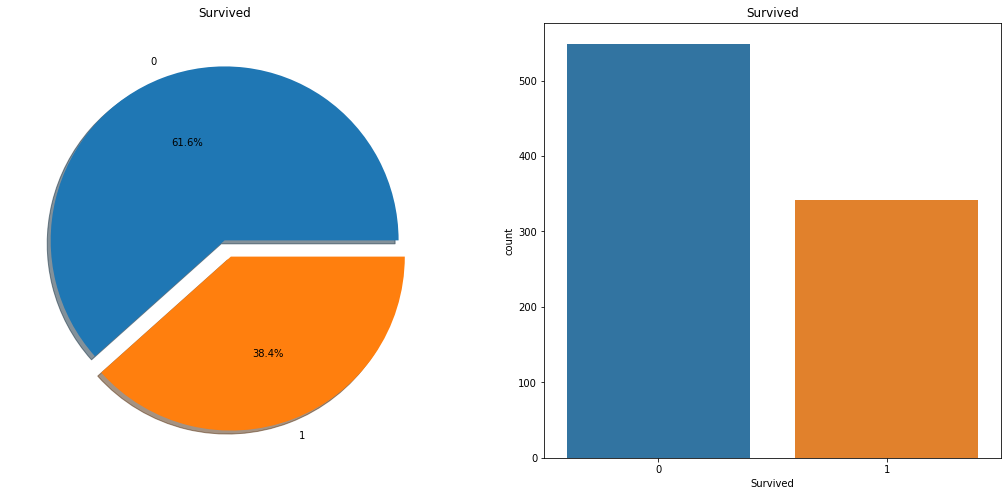

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

##### SEX

In [9]:
train.groupby(by='Sex')[['PassengerId']].count()

,PassengerId
Sex,
female,314
male,577


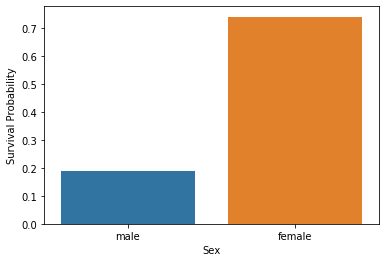

In [10]:
g = sns.barplot(x="Sex",y="Survived",data=train, ci=None)
g = g.set_ylabel("Survival Probability")

##### PCLASS

In [11]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

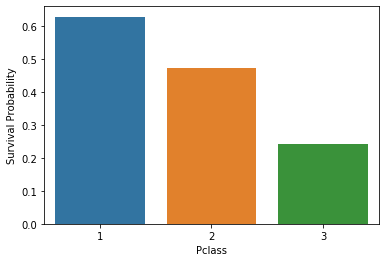

In [12]:
g = sns.barplot(x="Pclass",y="Survived",data=train, ci=None)
g = g.set_ylabel("Survival Probability")

##### EMBARKED

In [13]:
train.groupby(by='Embarked')[['PassengerId']].count()

,PassengerId
Embarked,
C,168
Q,77
S,644


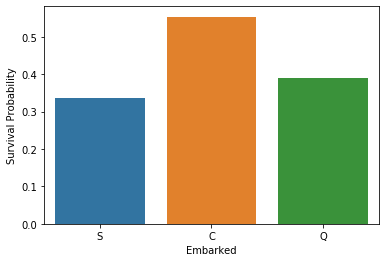

In [14]:
g = sns.barplot(x="Embarked",y="Survived",data=train, ci=None)
g = g.set_ylabel("Survival Probability")

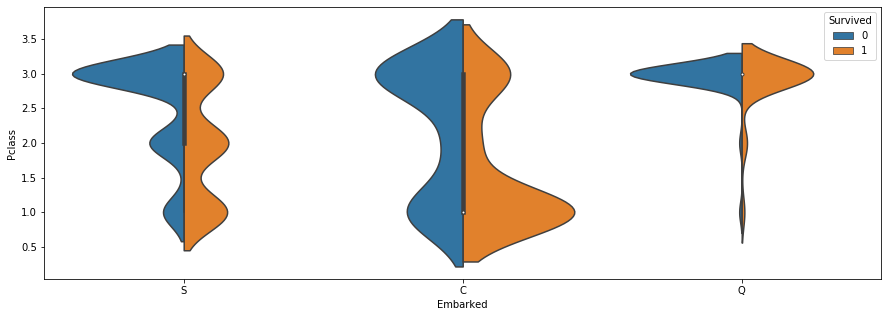

In [15]:

fig = plt.figure(figsize=(15,5))
sns.violinplot(x="Embarked", y="Pclass", hue="Survived", data=train, split=True)

In [16]:
train["Embarked"].isna().sum()

2

#### AGE

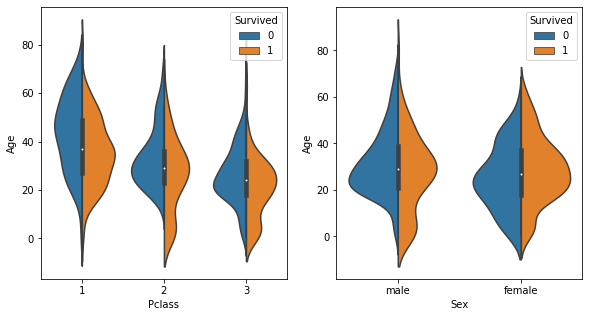

In [17]:
fig = plt.figure(figsize=(15,5))
#ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


#sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)


##### Pclass plot:

1) 1st class has very few children(0-18)

2) All children in 2nd class survived

3) Most children in 3rd class survived

#### Sex plot:

1) Most male children survived

2) 20-38 females have better survival chance

#### FARE

In [18]:
train.groupby(by='Embarked')[['Fare']].sum()

,Fare
Embarked,
C,10072.2962
Q,1022.2543
S,17439.3988


In [19]:
train.groupby(by='Survived')[['Fare']].sum()

,Fare
Survived,
0,12142.7199
1,16551.2294


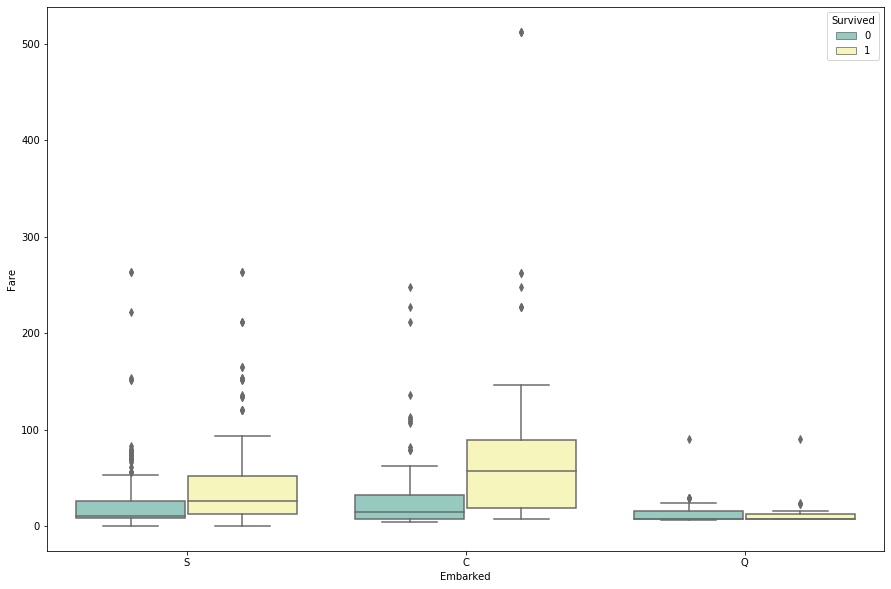

In [20]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=train, palette="Set3")

#### NAME


In [21]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
train["Name"].describe()

count                                       891
unique                                      891
top       Baclini, Mrs. Solomon (Latifa Qurban)
freq                                          1
Name: Name, dtype: object

### SipSp&Parch


In [23]:
train.groupby(by='SibSp')[['PassengerId']].count()

,PassengerId
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [24]:
train.groupby(by='Parch')[['PassengerId']].count()

,PassengerId
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


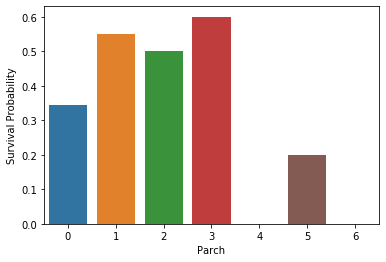

In [25]:
g = sns.barplot(x="Parch",y="Survived",data=train, ci=None)
g = g.set_ylabel("Survival Probability")

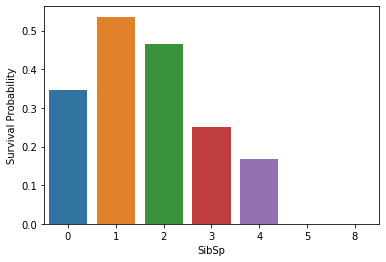

In [26]:
g = sns.barplot(x="SibSp",y="Survived",data=train, ci=None)
g = g.set_ylabel("Survival Probability")

In [27]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [28]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

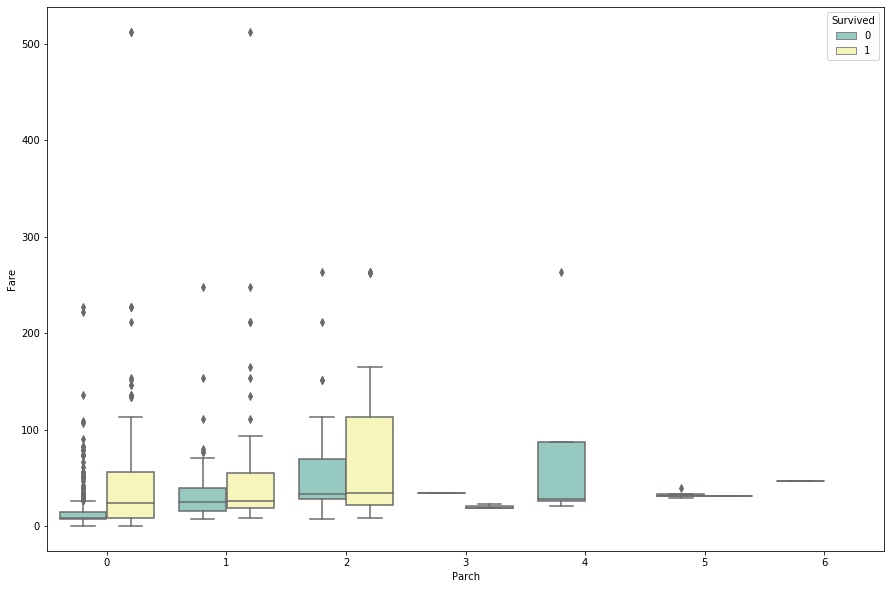

In [29]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Parch", y="Fare", hue="Survived", data=train, palette="Set3")


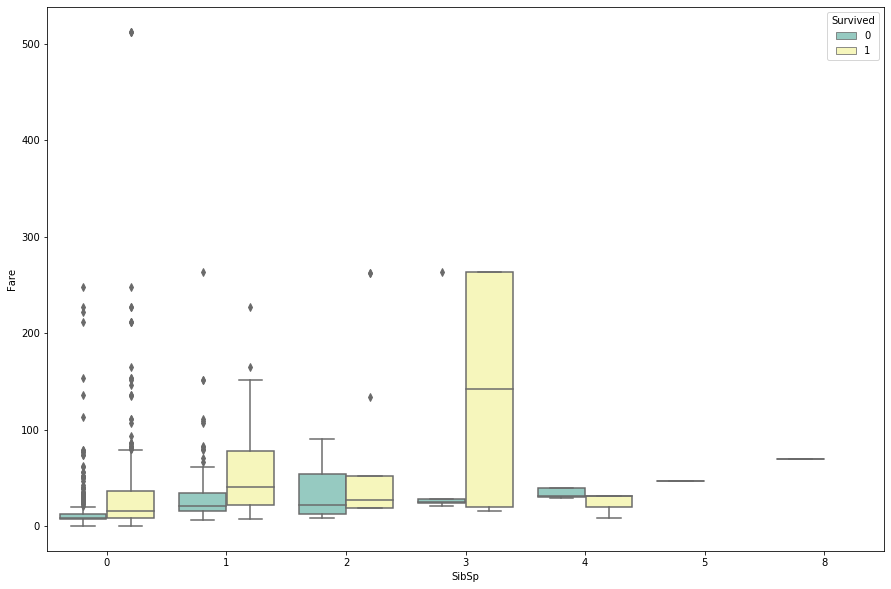

In [30]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x="SibSp", y="Fare", hue="Survived", data=train, palette="Set3")

## Ticket

In [31]:
train.groupby(by='Ticket')[['Name']].count()

,Name
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


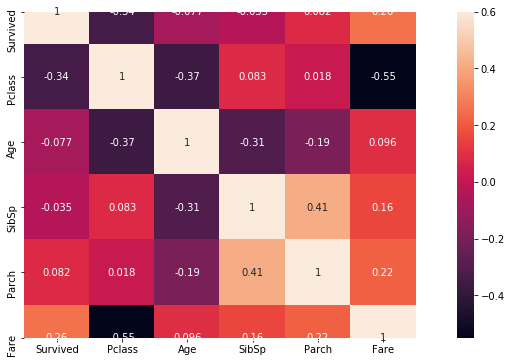

In [32]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

# 2. Data preprocessing

Categorical to numerical

In [33]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

##### Sex

In [34]:
for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


##### Fare

In features Fare and Embarked we have few NaN values. 

In [35]:
test['Fare'].isna().sum()

1

In [36]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)


##### Embarked


We have 2 NaN values in Embarked. Replace them with fashion.

In [37]:
train['Embarked'].isna().sum()

2

In [38]:
train.groupby(by='Embarked')[['Embarked']].count()

,Embarked
Embarked,
C,168
Q,77
S,644


In [39]:
train['Embarked']=train['Embarked'].fillna('S')

##### Age

Let's replace the NaN values with the median for the samples from the functions “Pclass” and “Sex”.

In [40]:
print("Train Age missing %: " + str(train.Age.isnull().sum()*100/len(train.Age)))

Train Age missing %: 19.865319865319865


In [41]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [42]:
for dataset in alldata:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    


In [43]:
train.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,25,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,C


# 3. Feature Engineering

#### Name

In [44]:
for dataset in alldata:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [45]:
for dataset in alldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [46]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in alldata:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,3


In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,3


#### SibSp&Parch

In [48]:
SibSp = train['SibSp']
Parch = train['Parch']

In [49]:
SibParch = pd.concat([SibSp,Parch],axis=0)
SibParch = SibParch.values

In [50]:
rank = np.rank([SibParch])
rank

2

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 69.7+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 29.5+ KB


In [53]:
for dataset in alldata:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [54]:
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null int32
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 62.7+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null int32
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
FamilySize     418 non-null int64
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 26.2+ KB


In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,8.0500,NaN,S,1,1


In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,34,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,363272,7.0000,NaN,S,3,2
2,894,2,"Myles, Mr. Thomas Francis",0,62,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,3101298,12.2875,NaN,S,3,3


In [59]:
train.shape, test.shape

((891, 12), (418, 11))

In [60]:
total_train = train.isnull().sum().sort_values(ascending = False)
total_train

Cabin          687
FamilySize       0
Title            0
Embarked         0
Fare             0
Ticket           0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [61]:
total_test = test.isnull().sum().sort_values(ascending = False)
total_test

Cabin          327
FamilySize       0
Title            0
Embarked         0
Fare             0
Ticket           0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

##### Cabin, Ticket

In [62]:
train = train.drop(['Cabin','Ticket', 'PassengerId', 'Name'], axis=1)
test = test.drop(['Cabin','Ticket', 'PassengerId', 'Name'], axis=1)

In [63]:
train.info()
print('*'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 45.3+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null int32
Fare          418 non-null float64
Embarked      418 non-null object
Title         418 non-null int64
FamilySize    418 non-null int64
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 18.0+ KB


### OneHotEncoding for Embarked, Pclass

In [64]:
def one_hot_encoding(dtf, columns):
    for column in columns:
        dm = pd.get_dummies(dtf[column], prefix=column)
        dtf.drop(column, axis=1, inplace=True)
        dtf = pd.concat([dtf, dm], axis=1)
    return dtf

In [65]:
categorial_columns = ['Embarked', 'Pclass']

In [66]:
train = one_hot_encoding(train, categorial_columns)
test = one_hot_encoding(test, categorial_columns)

In [67]:
test.head()

,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34,7.8292,1,1,0,1,0,0,0,1
1,1,47,7.0000,3,2,0,0,1,0,0,1
2,0,62,9.6875,1,1,0,1,0,0,1,0
3,0,27,8.6625,1,1,0,0,1,0,0,1
4,1,22,12.2875,3,3,0,0,1,0,0,1


In [68]:
train.head()

,Survived,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22,7.2500,1,2,0,0,1,0,0,1
1,1,1,38,71.2833,3,2,1,0,0,1,0,0
2,1,1,26,7.9250,2,1,0,0,1,0,0,1
3,1,1,35,53.1000,3,2,0,0,1,1,0,0
4,0,0,35,8.0500,1,1,0,0,1,0,0,1


In [69]:
train.shape, test.shape

((891, 12), (418, 11))

In [70]:
train.head()

,Survived,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22,7.2500,1,2,0,0,1,0,0,1
1,1,1,38,71.2833,3,2,1,0,0,1,0,0
2,1,1,26,7.9250,2,1,0,0,1,0,0,1
3,1,1,35,53.1000,3,2,0,0,1,1,0,0
4,0,0,35,8.0500,1,1,0,0,1,0,0,1


In [71]:
test.head()

,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34,7.8292,1,1,0,1,0,0,0,1
1,1,47,7.0000,3,2,0,0,1,0,0,1
2,0,62,9.6875,1,1,0,1,0,0,1,0
3,0,27,8.6625,1,1,0,0,1,0,0,1
4,1,22,12.2875,3,3,0,0,1,0,0,1


# 5. Data preparation for model

In [72]:
all_features = train.drop("Survived", axis=1)
Targeted_feature = train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 11), (268, 11), (623,), (268,))

In [73]:
test.head()

,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34,7.8292,1,1,0,1,0,0,0,1
1,1,47,7.0000,3,2,0,0,1,0,0,1
2,0,62,9.6875,1,1,0,1,0,0,1,0
3,0,27,8.6625,1,1,0,0,1,0,0,1
4,1,22,12.2875,3,3,0,0,1,0,0,1


# 6. Baseline model

In [74]:
#Logistic_Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_score = logreg.score(X_test,y_test)
logreg_score

0.8059701492537313

# 7. Model selection

#### Decision Tree Classifier

In [75]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_score = decision_tree.score(X_test, y_test)
decision_tree_score

0.7873134328358209

#### KNN

In [76]:
#KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
knn_score

0.7201492537313433

#### RandomForestClassifier

In [77]:
#RFC
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rfc_score = random_forest.score(X_test, y_test)
rfc_score

0.7947761194029851

## **Results**

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Models')]

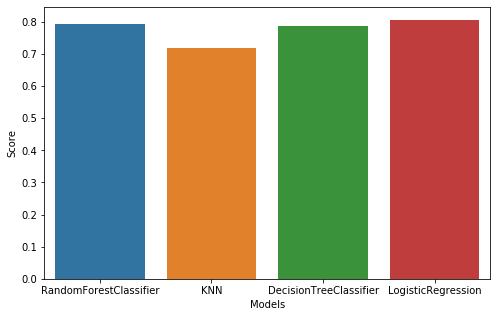

In [78]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
fig = sns.barplot(y=[rfc_score, knn_score, decision_tree_score, logreg_score], x=["RandomForestClassifier", "KNN", "DecisionTreeClassifier", "LogisticRegression"], ax=ax1)
fig.set(xlabel="Models", ylabel="Score")

# 8. Model’s hyperparameters tuning

#### RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()

In [80]:
param_grid = { 
    'n_estimators': [75, 150, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' :[2,3],
    'min_samples_leaf' :[1,2,3]
}

In [81]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [82]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [83]:
CV_rfc.best_score_

0.8394863563402889

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.09
The cross validated score for Random Forest Classifier is: 82.16


Text(0.5, 1.05, 'Confusion_matrix')

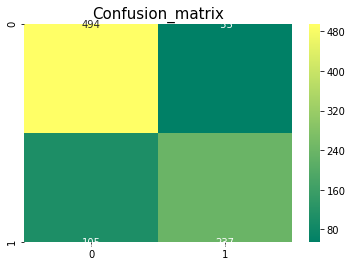

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini',max_depth=7, n_estimators=150, max_features='sqrt',min_samples_leaf=1,min_samples_split=3)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred_RFC = cross_val_predict(model,all_features,Targeted_feature,cv=5)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred_RFC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#### Logistic Regression

In [85]:
logreg = LogisticRegression()

In [86]:
param_grid = { 
   # 'penalty': ['l1', 'l2'],
     'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [87]:
CV_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 5)
CV_logreg.fit(X_train, y_train)

c:\titanic\opencvenv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
CV_logreg.best_params_

{'C': 0.1, 'solver': 'liblinear'}

In [89]:
CV_logreg.best_score_

0.8330658105939005

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 80.6
The cross validated score for Logistic REgression is: 81.6


Text(0.5, 1.05, 'Confusion_matrix')

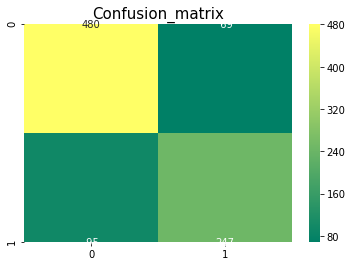

In [90]:
model = LogisticRegression(C = 0.1, solver = 'liblinear')
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=5,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred_LOGREG = cross_val_predict(model,all_features,Targeted_feature,cv=5)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred_LOGREG),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#### DecisionTreeClassifier

In [91]:
dtc = DecisionTreeClassifier()

In [92]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':[5,6,7,8],
    'min_samples_split': [2,3,4], 
    'min_samples_leaf': [1,2,3],
    'min_weight_fraction_leaf': [0.0,0.2,0.3,0.4,0.5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [93]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=params_grid, cv= 5)
CV_dtc.fit(X_train,y_train)

c:\titanic\opencvenv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         

In [94]:
CV_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [95]:
CV_dtc.best_score_

0.8314606741573034

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 77.24
The cross validated score for Decision Tree classifier is: 80.47


Text(0.5, 1.05, 'Confusion_matrix')

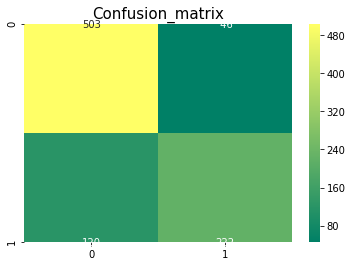

In [96]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', max_depth=5,
                             min_samples_split=4,min_samples_leaf=2, min_weight_fraction_leaf=0.0, splitter='best',
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=5,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred_DTC = cross_val_predict(model,all_features,Targeted_feature,cv=5)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred_DTC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#### KNN

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7201492537313433

In [99]:
paramms_grid = {
    'n_neighbors': [2,3,4,5,6],
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [28,29,30,31,32], 
    'p': [1,2]
}

In [100]:
CV_knn = GridSearchCV(estimator=knn, param_grid=paramms_grid, cv= 5)
CV_knn.fit(X_train,y_train)

c:\titanic\opencvenv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [28, 29, 30, 31, 32],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
CV_knn.best_params_

{'algorithm': 'brute',
 'leaf_size': 28,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'uniform'}

In [102]:
CV_knn.best_score_

0.7463884430176565

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 76.12
The cross validated score for Decision Tree classifier is: 73.51


Text(0.5, 1.05, 'Confusion_matrix')

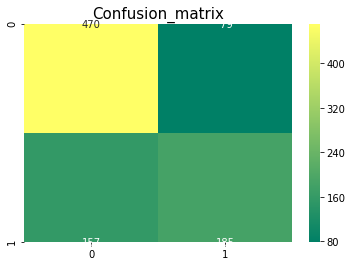

In [103]:
model= KNeighborsClassifier(algorithm='brute', leaf_size=28, n_neighbors=6, p=1, weights='uniform')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=5,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred_KNN = cross_val_predict(model,all_features,Targeted_feature,cv=5)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred_KNN),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Models')]

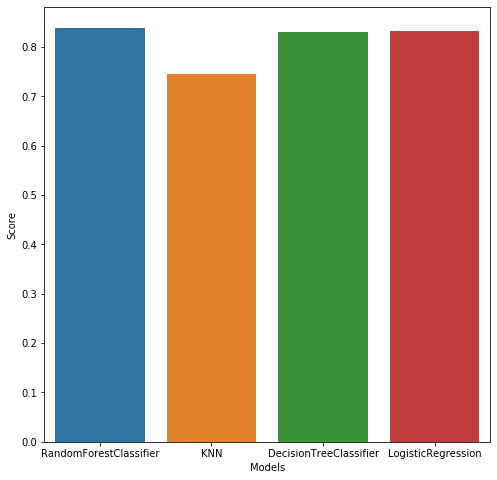

In [108]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
fig = sns.barplot(y=[CV_rfc.best_score_, CV_knn.best_score_, CV_dtc.best_score_, CV_logreg.best_score_], x=["RandomForestClassifier", "KNN", "DecisionTreeClassifier", "LogisticRegression"], ax=ax1)
fig.set(xlabel="Models", ylabel="Score")